<br>
<img src="../Images/Skilvul.png" alt="Technical Test - Mentor Data Science & AI"/>
<h1>AI Development</h1>
<p>Davin Darmalaksana Bhagaspati | davindbhagaspati@gmail.com | +6281296609520</p>
<h3>Case Study: Predictive Analytics for E-commerce</h3>
<br>
<strong>Business Context:</strong>
<br>
You are hired as a Data Science and AI for an e-commerce company named <strong>"Terra Store"</strong>. Terra Store is looking to enhance its marketing strategy by predicting customer purchase behavior based on historical data. The company wants to build an AI-powered application that can provide insights into which products a customer is likely to purchase next.

<strong>Problem Statement:</strong>
<br>
Terra Store has provided you with a dataset containing information about customer interactions, purchases, and product details. Your task is to develop a web-based AI application that predicts the next product a customer is likely to buy. The application should be user-friendly, allowing marketing teams to target customers more effectively.

<strong>Model Definition:</strong>
<br>
Predict the next product a customer is likely to buy.

<strong>How I Will Develop The Model:</strong>
<br>
The model development will be seperated into 2 sections:
<br>
&nbsp;&nbsp;<strong>1. Build The Dataset</strong>
<br>
&nbsp;&nbsp;<strong>2. Data Preprocessing & Modeling</strong>

## 1. Build The Dataset

### 1.1. Import Libraries

In [8]:
import pandas as pd
import numpy as np
import random
import warnings
from datetime import datetime, timedelta

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 600)
warnings.filterwarnings('ignore')

### 1.2. Functions

In [9]:
# Function to increase category variations and product variations within a category
def generate_new_rows(df_product, categories, repeats):
    num_new_rows = len(categories) * repeats

    new_rows = {
        'product_id': range(max(df_product['product_id']) + 1, max(df_product['product_id']) + num_new_rows + 1),
        'category': np.repeat(categories, repeats),
        'price': np.round(np.random.uniform(50, 800, num_new_rows) / 10) * 10,
        'ratings': np.round(np.random.uniform(3.5, 4.8, num_new_rows), 1)
    }

    new_rows['price'] = new_rows['price'].astype(int)

    return pd.DataFrame(new_rows)

### 1.3. Read The Given Datasets

In [10]:
df_cust = pd.read_csv('../Dataset/Given Datasets/customer_interactions.csv')
df_product = pd.read_csv('../Dataset/Given Datasets/product_details.csv')
df_purchase = pd.read_csv('../Dataset/Given Datasets/purchase_history.csv')

In [11]:
# Customer activity on e-commerce websites
df_cust

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [12]:
# Product details
df_product

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [13]:
# Transaction/Purchase details
df_purchase

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
5,5,101,2023-01-05


In [14]:
# Combine the transaction details with customer activity information
df_behaviour = df_purchase.merge(df_cust, on='customer_id', how='left')
df_behaviour

,customer_id,product_id,purchase_date,page_views,time_spent
0,1,101,2023-01-01,25,120
1,1,105,2023-01-05,25,120
2,2,102,2023-01-02,20,90
3,3,103,2023-01-03,30,150
4,4,104,2023-01-04,15,80
5,5,101,2023-01-05,22,110


<p>From <strong>customer_id 1</strong>, it is evident that there exists a disparity in purchase dates, while the counts of page views and time spent remain consistent. I assume that page views and time spent represent cumulative values, reflecting the total engagement on the website throughout the customer's active sessions. Consequently, I will proceed to aggregate (accumulate) the counts for both page views and time spent.</p>

In [15]:
# The aggregation
df_behaviour.loc[1, 'page_views'] = 28
df_behaviour.loc[1, 'time_spent'] = 130
df_behaviour

,customer_id,product_id,purchase_date,page_views,time_spent
0,1,101,2023-01-01,25,120
1,1,105,2023-01-05,28,130
2,2,102,2023-01-02,20,90
3,3,103,2023-01-03,30,150
4,4,104,2023-01-04,15,80
5,5,101,2023-01-05,22,110


### 1.4. Customize The Given Datasets

#### 1.4.1 Add new categories & product variants

In [16]:
# A category that already existed once
existed_category_1 = ['Electronics'] 

# Categories that already existed twice
existed_category_2 = ['Clothing', 'Home & Kitchen', 'Beauty'] # Categories that existed twice

# New categories
new_categories = [
    'Furniture', 
    'Sports & Outdoors', 
    'Toys & Games', 
    'Books & Media', 
    'Health & Wellness',
    'Automotive', 
    'Pet Supplies', 
    'Jewelry & Accessories', 
    'Office Supplies', 
    'Food & Grocery'
]

# Generate each category and multiply them so that each category has 3 variants
df_product = pd.concat([df_product, generate_new_rows(df_product, existed_category_1, 1)])
df_product = pd.concat([df_product, generate_new_rows(df_product, existed_category_2, 2)])
df_product = pd.concat([df_product, generate_new_rows(df_product, new_categories, 3)])

In [17]:
# Show Current Product Dictionary
df_product

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8
0,106,Electronics,510,4.2
0,107,Clothing,50,4.1
1,108,Clothing,270,3.8
2,109,Home & Kitchen,560,4.3
3,110,Home & Kitchen,400,3.8


In [18]:
# Combine all categories into a list
all_categories = [*existed_category_1, *existed_category_2, *new_categories]

# Sort alphabetically
all_categories.sort()

all_categories

['Automotive',
 'Beauty',
 'Books & Media',
 'Clothing',
 'Electronics',
 'Food & Grocery',
 'Furniture',
 'Health & Wellness',
 'Home & Kitchen',
 'Jewelry & Accessories',
 'Office Supplies',
 'Pet Supplies',
 'Sports & Outdoors',
 'Toys & Games']

In [19]:
# Length of all categories
len(all_categories)

14

#### 1.4.2. Generate more new users

In [20]:
# Combine behaviour activities and product details
df_all = df_behaviour.merge(df_product, on='product_id', how='left')
df_all

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
0,1,101,2023-01-01,25,120,Electronics,500,4.5
1,1,105,2023-01-05,28,130,Electronics,800,4.8
2,2,102,2023-01-02,20,90,Clothing,50,3.8
3,3,103,2023-01-03,30,150,Home & Kitchen,200,4.2
4,4,104,2023-01-04,15,80,Beauty,30,4.0
5,5,101,2023-01-05,22,110,Electronics,500,4.5


In [21]:
# Show all the data types
df_all.dtypes

customer_id        int64
product_id         int64
purchase_date     object
page_views         int64
time_spent         int64
category          object
price              int64
ratings          float64
dtype: object

In [22]:
df_user_dummy = df_all.copy()

# Get product id
product_id = df_product['product_id'].drop_duplicates().to_list()

# Generate random users so the total records become 51 rows.
for i in range(6, 51):
    
    date_ = "2023-01"
    date_days = random.randint(1, 5)
    date_time = date_ + f"-0{date_days}"
    
    df_dump = {
        "customer_id": [i],
        "product_id": [random.choice(product_id)],
        "purchase_date": [date_time],
        "page_views": [random.randint(25, 35)],
        "time_spent": [random.randint(80, 150)],
    }
    
    df_fix = pd.DataFrame(df_dump)
    df_fix = df_fix.merge(df_product, on='product_id', how='left')
    
    df_user_dummy = pd.concat([df_user_dummy, df_fix])
    
df_user_dummy

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
0,1,101,2023-01-01,25,120,Electronics,500,4.5
1,1,105,2023-01-05,28,130,Electronics,800,4.8
2,2,102,2023-01-02,20,90,Clothing,50,3.8
3,3,103,2023-01-03,30,150,Home & Kitchen,200,4.2
4,4,104,2023-01-04,15,80,Beauty,30,4.0
5,5,101,2023-01-05,22,110,Electronics,500,4.5
0,6,140,2023-01-05,33,92,Food & Grocery,550,4.2
0,7,122,2023-01-03,26,87,Books & Media,330,4.7
0,8,115,2023-01-01,29,91,Furniture,750,3.6
0,9,126,2023-01-03,28,136,Health & Wellness,780,4.6


#### 1.4.3. Build the category purchasing patterns
The dataset records are quite limited, however, it is indicated that I have the freedom to customize the datasets. In order to enhance the model's training and predictive capabilities, I need to construct a more comprehensive set of sampled purchasing patterns within different categories, thereby increasing the number of records.

In [23]:
# Build the category purchasing patterns
next_purchase = {
    'Automotive': 'Electronics',
    'Electronics': 'Books & Media',
    'Books & Media': 'Health & Wellness',
    'Health & Wellness': 'Food & Grocery',
    'Food & Grocery': 'Office Supplies',
    'Office Supplies': 'Jewelry & Accessories',
    'Jewelry & Accessories': 'Pet Supplies',
    'Pet Supplies': 'Furniture',
    'Furniture': 'Home & Kitchen',
    'Home & Kitchen': 'Sports & Outdoors',
    'Sports & Outdoors': 'Beauty',
    'Beauty': 'Clothing',
    'Clothing': 'Toys & Games',
    'Toys & Games': 'Automotive',
}

#### 1.4.4. Generate more historical transactions

In [24]:
# Generate more historical transactions
df_trx = df_user_dummy.copy()

for i in range(1, 51):
    
    # Get user
    df_user_now = df_user_dummy[df_user_dummy['customer_id'] == i]\
        .sort_values('purchase_date', ascending=False)\
        .head(1)
    
    # Get date
    date_ = df_user_now['purchase_date'].values[0]
    date_time = datetime.strptime(date_, "%Y-%m-%d").date()
    
    # Get page_views and time_spent
    page_views = df_user_now['page_views'].values[0]
    time_spent = df_user_now['time_spent'].values[0]
    
    last_cat = df_user_now['category'].values[0]
    
    # Generate 10 transactions each user
    for x in range(1, 11):
                
        page_views += random.randint(3, 7)
        time_spent += random.randint(10, 30)
        date_time += timedelta(days=random.randint(5, 15)) # add 5 days
        
        cat = next_purchase[last_cat]

        get_product_id = df_product[df_product['category'] == cat]\
            .sample(frac=1, random_state=42)\
            .head(1)['product_id']\
            .values[0]
        
        df_dump = {
            "customer_id": [i],
            "product_id": [get_product_id],
            "purchase_date": [date_time.strftime("%Y-%m-%d")],
            "page_views": [page_views],
            "time_spent": [time_spent],
        }
    
        df_fix = pd.DataFrame(df_dump)
        df_fix = df_fix.merge(df_product, on='product_id', how='left')
    
        df_trx = pd.concat([df_trx, df_fix])
        
        # Update last category
        last_cat = next_purchase[last_cat]
    
df_trx = df_trx.reset_index().drop('index', axis=1)
df_trx.head()

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
0,1,101,2023-01-01,25,120,Electronics,500,4.5
1,1,105,2023-01-05,28,130,Electronics,800,4.8
2,2,102,2023-01-02,20,90,Clothing,50,3.8
3,3,103,2023-01-03,30,150,Home & Kitchen,200,4.2
4,4,104,2023-01-04,15,80,Beauty,30,4.0


In [25]:
# Current number of trx (51 trx + generated 500 trx)
df_trx.shape[0]

551

In [26]:
# Duplicate the behaviour but change the customer id, assuming that they are different users
df_sampling = df_trx[df_trx['customer_id'] <= 35].copy()
df_sampling['customer_id'] = df_sampling['customer_id'] + 50

In [27]:
# Length of the duplicated sampled data
df_sampling.shape[0]

386

In [28]:
# Concat the original and the sampled data
df_trx_fix = pd.concat([df_trx, df_sampling])

In [29]:
# Length of all data (551 trx + 386 sampled trx)
df_trx_fix.shape

(937, 8)

In [30]:
# Delete some records so that there is a difference between the number of records for each user
# I make it into 800 records (137 data is removed)
df_trx_fix = df_trx_fix.sample(frac=1, random_state=42).head(800)

In [31]:
# Length of all fix data
df_trx_fix.shape[0]

800

In [32]:
# Show the data
df_trx_fix.head()

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
321,28,103,2023-01-15,28,154,Home & Kitchen,200,4.2
70,2,113,2023-03-29,78,282,Furniture,780,3.9
209,16,137,2023-04-15,79,254,Office Supplies,510,3.7
120,57,102,2023-04-02,68,285,Clothing,50,3.8
149,60,122,2023-04-03,79,333,Books & Media,330,4.7


#### 1.4.5. Export the DataFrame

Export the updated product details

In [33]:
# Total product the e-commerce has
df_product.shape[0]

42

In [34]:
# Print product details
df_product.head()

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [35]:
df_product.to_csv('../Dataset/Customized Datasets/final_product_details.csv', index=False)

Export the customer transaction details

In [36]:
# Total trx
df_trx_fix.shape[0]

800

In [37]:
# Print transaction details
df_trx_fix.head()

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
321,28,103,2023-01-15,28,154,Home & Kitchen,200,4.2
70,2,113,2023-03-29,78,282,Furniture,780,3.9
209,16,137,2023-04-15,79,254,Office Supplies,510,3.7
120,57,102,2023-04-02,68,285,Clothing,50,3.8
149,60,122,2023-04-03,79,333,Books & Media,330,4.7


In [38]:
df_trx_fix.to_csv('../Dataset/Customized Datasets/final_transactions.csv', index=False)

I export the <strong>final transactions dataset</strong>. So, in the <strong>Data Preprocessing & Modeling</strong>, I will import the new dataset.

## 2. Data Preprocessing & Modeling

### 2.1. Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
from xgboost import XGBClassifier
import warnings

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 600)
warnings.filterwarnings('ignore')

### 2.2. Read The Final Raw Dataset

In [40]:
df_trx_fix = pd.read_csv('../Dataset/Customized Datasets/final_transactions.csv')

In [41]:
df_trx_fix

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings
0,28,103,2023-01-15,28,154,Home & Kitchen,200,4.2
1,2,113,2023-03-29,78,282,Furniture,780,3.9
2,16,137,2023-04-15,79,254,Office Supplies,510,3.7
3,57,102,2023-04-02,68,285,Clothing,50,3.8
4,60,122,2023-04-03,79,333,Books & Media,330,4.7
...,...,...,...,...,...,...,...,...
795,32,102,2023-01-01,35,115,Clothing,50,3.8
796,70,128,2023-02-05,45,224,Automotive,150,3.8
797,15,134,2023-03-29,81,304,Jewelry & Accessories,170,4.0
798,9,131,2023-02-06,46,222,Pet Supplies,380,3.9


### 2.3. Feature Engineering
I will create new columns:
<br>
<strong>count_trx_before:</strong> Count all previous transactions.
<br>
<strong>latest_category_1:</strong> The first latest previous purchased category.
<br>
<strong>latest_category_2:</strong> The second latest previous purchased category.
<br>
<strong>latest_category_3:</strong> The third latest previous purchased category.
<br>
<strong>latest_category_4:</strong> The fourth latest previous purchased category.
<br>
<strong>latest_category_5:</strong> The fifth latest previous purchased category.
<br>
<strong>past_total_expense:</strong> Past total expense.
<br>
<strong>past_avg_expense:</strong> Past average expense.
<br>
<strong>past_avg_ratings:</strong> Past average expense.

In [42]:
df_combined = pd.DataFrame()

# Label encoding the categories
label_category = {
    'Automotive': 0,
    'Beauty': 1,
    'Books & Media': 2,
    'Clothing': 3,
    'Electronics': 4,
    'Food & Grocery': 5,
    'Furniture': 6,
    'Health & Wellness': 7,
    'Home & Kitchen': 8,
    'Jewelry & Accessories': 9,
    'Office Supplies': 10,
    'Pet Supplies': 11,
    'Sports & Outdoors': 12,
    'Toys & Games': 13,
    "": 14
}

# Loop for all users (100 users)
for i in range(1, 101):

    df_user = df_trx_fix[df_trx_fix['customer_id'] == i]

    df_user_purchase_dates = df_user.sort_values('purchase_date')['purchase_date'].drop_duplicates().to_list()

    for past_date in df_user_purchase_dates:
        df_user_past_all = df_user[df_user['purchase_date'] < past_date]

        # Fill 0 for default output
        new_feats = {
            "customer_id": [i],
            "purchase_date": [past_date],
            "count_trx_before": [0],
            "latest_category_1": [14],
            "latest_category_2": [14],
            "latest_category_3": [14],
            "latest_category_4": [14],
            "latest_category_5": [14],
            "past_total_expense": [0],
            "past_avg_expense": [0],
            "past_avg_ratings": [0],
        }

        # If it is not 1st trx
        if df_user_past_all.shape[0] > 0:

            df_user_past = df_user_past_all.sort_values('purchase_date', ascending=False).reset_index().drop("index", axis=1).reset_index()

            count_trx_before = df_user_past.shape[0]
            latest_category_1 = df_user_past[df_user_past['index'] == 0]['category'].values[0] if df_user_past[df_user_past['index'] == 0].shape[0] > 0 else ""
            latest_category_2 = df_user_past[df_user_past['index'] == 1]['category'].values[0] if df_user_past[df_user_past['index'] == 1].shape[0] > 0 else ""
            latest_category_3 = df_user_past[df_user_past['index'] == 2]['category'].values[0] if df_user_past[df_user_past['index'] == 2].shape[0] > 0 else ""
            latest_category_4 = df_user_past[df_user_past['index'] == 3]['category'].values[0] if df_user_past[df_user_past['index'] == 3].shape[0] > 0 else ""
            latest_category_5 = df_user_past[df_user_past['index'] == 4]['category'].values[0] if df_user_past[df_user_past['index'] == 4].shape[0] > 0 else ""

            # Past expense
            total_expense = df_user_past['price'].sum()
            avg_expense = df_user_past['price'].mean()

            # Passed ratings
            avg_rating = df_user_past['ratings'].mean()

            new_feats = {
                "customer_id": [i],
                "purchase_date": [past_date],
                "count_trx_before": [count_trx_before],
                "latest_category_1": [label_category[latest_category_1]],
                "latest_category_2": [label_category[latest_category_2]],
                "latest_category_3": [label_category[latest_category_3]],
                "latest_category_4": [label_category[latest_category_4]],
                "latest_category_5": [label_category[latest_category_5]],
                "past_total_expense": [total_expense],
                "past_avg_expense": [avg_expense],
                "past_avg_ratings": [avg_rating],
            }

        df_new_feats = pd.DataFrame(new_feats)

        df_combined = pd.concat([df_combined, df_new_feats])

display(df_combined)

,customer_id,purchase_date,count_trx_before,latest_category_1,latest_category_2,latest_category_3,latest_category_4,latest_category_5,past_total_expense,past_avg_expense,past_avg_ratings
0,1,2023-01-01,0,14,14,14,14,14,0,0.000000,0.000000
0,1,2023-01-18,1,4,14,14,14,14,500,500.000000,4.500000
0,1,2023-02-10,2,2,4,14,14,14,830,415.000000,4.600000
0,1,2023-02-16,3,5,2,4,14,14,1380,460.000000,4.466667
0,1,2023-03-02,4,10,5,2,4,14,1890,472.500000,4.275000
...,...,...,...,...,...,...,...,...,...,...,...
0,85,2023-02-19,4,11,10,5,7,14,2220,555.000000,4.100000
0,85,2023-02-25,5,6,11,10,5,7,3000,600.000000,4.060000
0,85,2023-03-21,6,8,6,11,10,5,3200,533.333333,4.083333
0,85,2023-03-26,7,1,8,6,11,10,3230,461.428571,4.071429


In [43]:
# Concat the new added features to the original dataframe
df_final = df_trx_fix.merge(df_combined, on=['customer_id', 'purchase_date'], how='inner')
df_final

,customer_id,product_id,purchase_date,page_views,time_spent,category,price,ratings,count_trx_before,latest_category_1,latest_category_2,latest_category_3,latest_category_4,latest_category_5,past_total_expense,past_avg_expense,past_avg_ratings
0,28,103,2023-01-15,28,154,Home & Kitchen,200,4.2,1,6,14,14,14,14,120,120.000000,3.700000
1,2,113,2023-03-29,78,282,Furniture,780,3.9,8,11,9,10,5,7,2770,346.250000,4.000000
2,16,137,2023-04-15,79,254,Office Supplies,510,3.7,7,5,7,2,0,13,2010,287.142857,4.142857
3,57,102,2023-04-02,68,285,Clothing,50,3.8,9,1,12,8,6,11,3600,400.000000,4.055556
4,60,122,2023-04-03,79,333,Books & Media,330,4.7,7,4,0,13,1,12,2850,407.142857,4.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,32,102,2023-01-01,35,115,Clothing,50,3.8,0,14,14,14,14,14,0,0.000000,0.000000
796,70,128,2023-02-05,45,224,Automotive,150,3.8,3,13,3,1,14,14,1370,456.666667,4.000000
797,15,134,2023-03-29,81,304,Jewelry & Accessories,170,4.0,9,10,5,7,2,4,3020,335.555556,4.133333
798,9,131,2023-02-06,46,222,Pet Supplies,380,3.9,4,9,10,5,7,14,2010,502.500000,4.125000


### 2.4. Label Encoding

In [44]:
# Label encoding the categories
label_category = {
    'Automotive': 0,
    'Beauty': 1,
    'Books & Media': 2,
    'Clothing': 3,
    'Electronics': 4,
    'Food & Grocery': 5,
    'Furniture': 6,
    'Health & Wellness': 7,
    'Home & Kitchen': 8,
    'Jewelry & Accessories': 9,
    'Office Supplies': 10,
    'Pet Supplies': 11,
    'Sports & Outdoors': 12,
    'Toys & Games': 13,
    "": 14
}

# Add flag column (the label encoded)
df_final['flag'] = df_final['category'].map(label_category).astype(int)

### 2.4. Split Dataset

In [45]:
# Define the test size, I define it as 70% train and 30% test.
test_size = 0.3

# Split the datasets
train, test = train_test_split(df_final, test_size=test_size, random_state=42)

In [46]:
# Train shape
train.shape

(560, 18)

In [47]:
# Test shape
test.shape

(240, 18)

### 2.5. Model Training

In [48]:
# Define Flag
flag = 'flag'

# Add non features list
non_feat = [
    'flag',
    'customer_id',
    'purchase_date',
    'product_id',
    'category',
    'price',
    'ratings'
]

# Define feature list
feat_list = list(set(df_final.columns.to_list()) - set(non_feat))
feat_list.sort()

len(feat_list)

11

In [49]:
# Show features
feat_list

['count_trx_before',
 'latest_category_1',
 'latest_category_2',
 'latest_category_3',
 'latest_category_4',
 'latest_category_5',
 'page_views',
 'past_avg_expense',
 'past_avg_ratings',
 'past_total_expense',
 'time_spent']

In [50]:
# Show the flag
flag

'flag'

In [51]:
%%time

# Define the model (multiclass classification)
model = XGBClassifier(
    objective="multi:softmax",
    random_state=42,
    n_jobs=-1,
    verbosity=1,
)

# Model fitting
model.fit(train[feat_list], train[flag])

CPU times: user 2.47 s, sys: 1.1 s, total: 3.57 s
Wall time: 401 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [52]:
# Predict the class for each dataset
train['predict_class'] = model.predict(train[feat_list])[:]
test['predict_class'] = model.predict(test[feat_list])[:]

# Infer the accuracy
train_accuracy = accuracy_score(train['predict_class'], train[flag])
test_accuracy = accuracy_score(test['predict_class'], test[flag])

# Evaluate precision, recall, and F1 score
train_precision = precision_score(train['predict_class'], train[flag], average='weighted')
train_recall = recall_score(train['predict_class'], train[flag], average='weighted')
train_f1 = f1_score(train['predict_class'], train[flag], average='weighted')

test_precision = precision_score(test['predict_class'], test[flag], average='weighted')
test_recall = recall_score(test['predict_class'], test[flag], average='weighted')
test_f1 = f1_score(test['predict_class'], test[flag], average='weighted')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.9964285714285714
Test Accuracy: 0.7625

Train Precision: 0.9964700996677741
Test Precision: 0.7760658265142915

Train Recall: 0.9964285714285714
Test Recall: 0.7625

Train F1 Score: 0.9964292640132976
Test F1 Score: 0.7639614139774148


It shows that the model is experiencing <strong>overfitting</strong>, with a tendency to fit the training data significantly better than the test set. To address this issue, adjustments to the model are required, possibly implementing <strong>feature selection techniques</strong> and involving <strong>model tuning</strong> .

### 2.6. Feature Selection

#### 2.6.1. Feature Importance Technique
It shows the significance of different features (input variables) in predicting the target variable. As we can see that the <strong>latest_category_1</strong> has the most impactful in influencing the model's predictions.|

<Axes: title={'center': 'Feature Importances'}, xlabel='Features'>

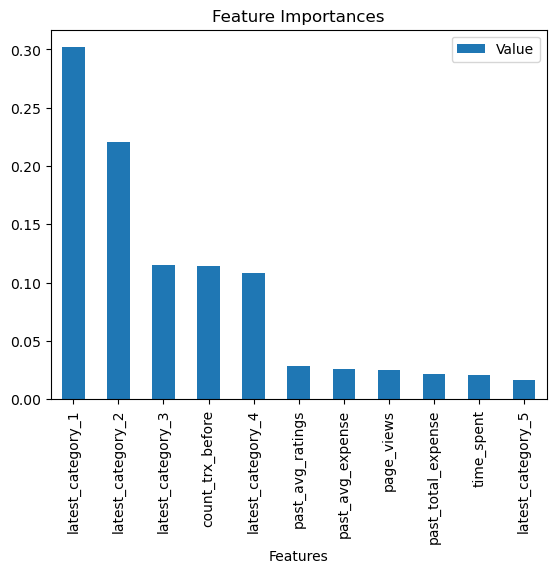

In [53]:
# Get the feature importance
feature_importance = pd.Series(model.feature_importances_, train[feat_list].columns).sort_values(ascending = False).reset_index().rename(columns={'index': 'Features', 0: 'Value'})
feature_importance.set_index('Features').plot(kind='bar', title='Feature Importances')

#### 2.6.2. Correlation

It measures that quantifies the degree to which two variables change together. It indicates the strength and direction of a linear relationship between two variables. To mitigate high correlation, my strategy involves excluding features with values surpassing 0.7, indicating a significant correlation. Additionally, I will prioritize the removal of the feature with the lowest importance.

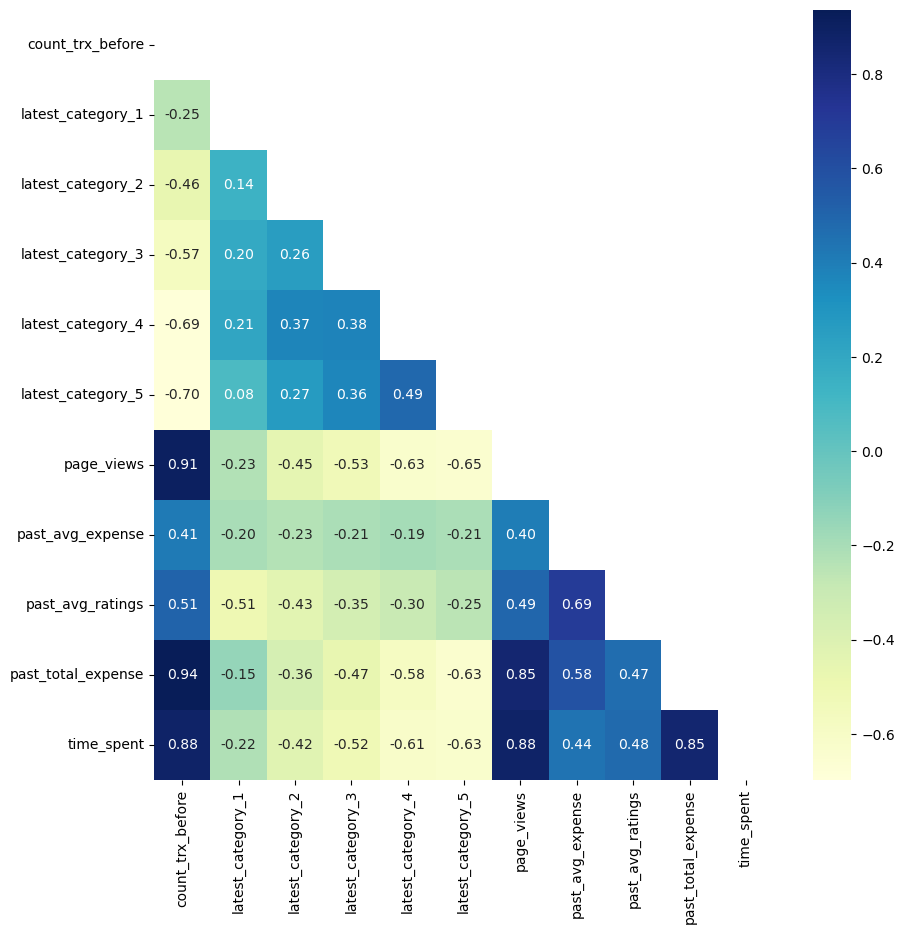

In [54]:
mask = np.triu(np.ones_like(train[feat_list].corr()))
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(train[feat_list].corr(), fmt='.2f', cmap="YlGnBu", annot=True, mask=mask)

# Show the correlation matrix
plt.show()

### 2.8. Final Selected Features & Modeling

In [55]:
# Final selected features
feat_list = [
    'latest_category_1',
    'latest_category_2',
    'latest_category_3',
    'latest_category_4',
    'latest_category_5',
]

In [56]:
%%time

# Define the model (multiclass classification)
model = XGBClassifier(
    objective="multi:softmax",
    
    random_state=42,
    n_jobs=-1,
    verbosity=1,
)

# Model fitting
model.fit(train[feat_list], train[flag])

CPU times: user 1.88 s, sys: 745 ms, total: 2.63 s
Wall time: 274 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [57]:
# Predict the class for each dataset
train['predict_class'] = model.predict(train[feat_list])[:]
test['predict_class'] = model.predict(test[feat_list])[:]

# Infer the accuracy
train_accuracy = accuracy_score(train['predict_class'], train[flag])
test_accuracy = accuracy_score(test['predict_class'], test[flag])

# Evaluate precision, recall, and F1 score
train_precision = precision_score(train['predict_class'], train[flag], average='weighted')
train_recall = recall_score(train['predict_class'], train[flag], average='weighted')
train_f1 = f1_score(train['predict_class'], train[flag], average='weighted')

test_precision = precision_score(test['predict_class'], test[flag], average='weighted')
test_recall = recall_score(test['predict_class'], test[flag], average='weighted')
test_f1 = f1_score(test['predict_class'], test[flag], average='weighted')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.8
Test Accuracy: 0.7833333333333333

Train Precision: 0.8184056901584168
Test Precision: 0.8052152603731549

Train Recall: 0.8
Test Recall: 0.7833333333333333

Train F1 Score: 0.7881637140842119
Test F1 Score: 0.7724606859542794


As we can see, the model is getting more efficient. I reduced the features from 15 into 5 and the model has resulted in a more adept and well-performing model.

<Axes: title={'center': 'Feature Importances'}, xlabel='Features'>

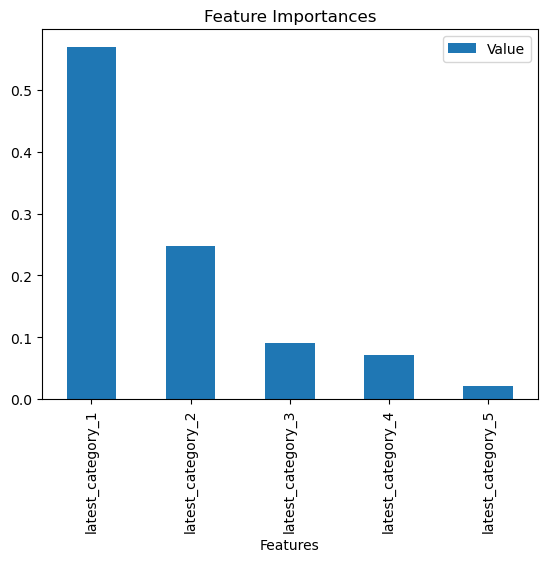

In [58]:
# Get the feature importance
feature_importance = pd.Series(model.feature_importances_, train[feat_list].columns).sort_values(ascending = False).reset_index().rename(columns={'index': 'Features', 0: 'Value'})
feature_importance.set_index('Features').plot(kind='bar', title='Feature Importances')

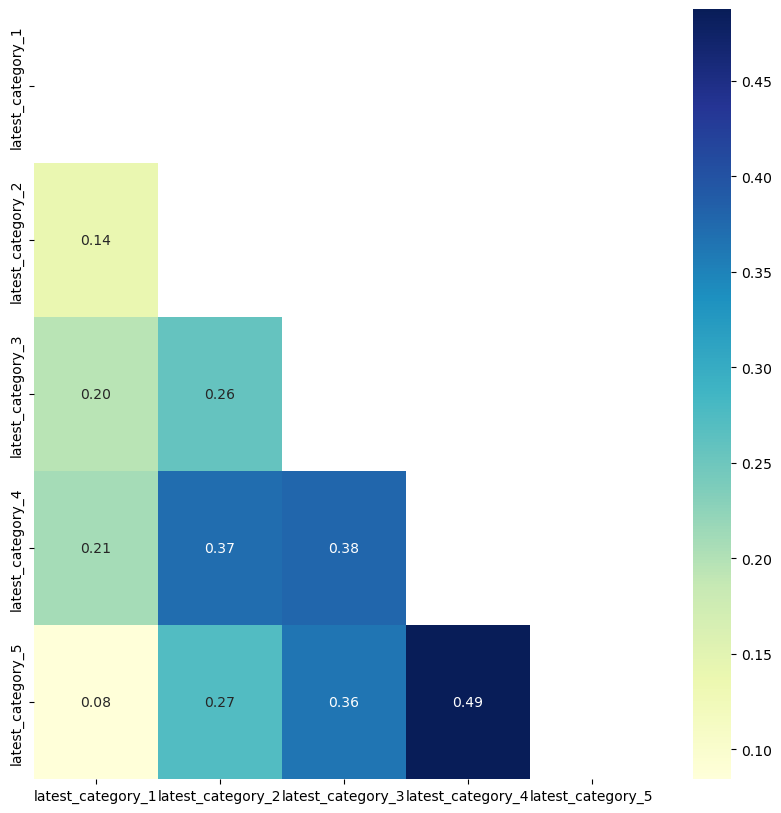

In [59]:
mask = np.triu(np.ones_like(train[feat_list].corr()))
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(train[feat_list].corr(), fmt='.2f', cmap="YlGnBu", annot=True, mask=mask)

# Show the correlation matrix
plt.show()

The correlation remains within an acceptable threshold, staying below 0.7 as I targeted.

### 2.7. Tuning the model

In [60]:
%%time

# Define the model (multiclass classification)
model = XGBClassifier(
    objective="multi:softmax",
    
    eta=0.01, # I add the learning rate
    
    random_state=42,
    n_jobs=-1,
    verbosity=1,
)

# Model fitting
model.fit(train[feat_list], train[flag])

CPU times: user 2.01 s, sys: 828 ms, total: 2.84 s
Wall time: 318 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [61]:
# Predict the class for each dataset
train['predict_class'] = model.predict(train[feat_list])[:]
test['predict_class'] = model.predict(test[feat_list])[:]

# Infer the accuracy
train_accuracy = accuracy_score(train['predict_class'], train[flag])
test_accuracy = accuracy_score(test['predict_class'], test[flag])

# Evaluate precision, recall, and F1 score
train_precision = precision_score(train['predict_class'], train[flag], average='weighted')
train_recall = recall_score(train['predict_class'], train[flag], average='weighted')
train_f1 = f1_score(train['predict_class'], train[flag], average='weighted')

test_precision = precision_score(test['predict_class'], test[flag], average='weighted')
test_recall = recall_score(test['predict_class'], test[flag], average='weighted')
test_f1 = f1_score(test['predict_class'], test[flag], average='weighted')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print()
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print()
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print()
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.7857142857142857
Test Accuracy: 0.7916666666666666

Train Precision: 0.8050631728535482
Test Precision: 0.8094146477304371

Train Recall: 0.7857142857142857
Test Recall: 0.7916666666666666

Train F1 Score: 0.7735043676199516
Test F1 Score: 0.7794025878315262


The observed trend indicates significant improvement in the model's performance. This enhancement is attributed to the adjustment of the learning rate to a smaller value, facilitating the model's convergence and reaching an optimal solution.

### 2.8. Export the model

Saving the model in pickle format.

In [62]:
with open('../Saved Model/model.pkl', 'wb') as file:
    pickle.dump(model, file)

### 2.9. Inference All Customer Top Recommendation

In [63]:
df = df_final[["customer_id", "purchase_date", *feat_list]].copy()

In [64]:
df.head()

,customer_id,purchase_date,latest_category_1,latest_category_2,latest_category_3,latest_category_4,latest_category_5
0,28,2023-01-15,6,14,14,14,14
1,2,2023-03-29,11,9,10,5,7
2,16,2023-04-15,5,7,2,0,13
3,57,2023-04-02,1,12,8,6,11
4,60,2023-04-03,4,0,13,1,12


In [65]:
# Filter the latest purchase date
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

latest_purchase_idx = df.groupby('customer_id')['purchase_date'].idxmax()

df_latest_purchase = df.loc[latest_purchase_idx]

df_latest_purchase.shape[0]

85

In [66]:
prediction = model.predict_proba(df_latest_purchase[feat_list]).tolist()
string_representations = [str(item) for item in prediction]
df_latest_purchase['prediction'] = string_representations

In [67]:
df_latest_purchase.head()

,customer_id,purchase_date,latest_category_1,latest_category_2,latest_category_3,latest_category_4,latest_category_5,prediction
95,1,2023-04-11,12,6,11,9,10,"[0.03943175822496414, 0.4623540937900543, 0.03..."
1,2,2023-03-29,11,9,10,5,7,"[0.03839224576950073, 0.041861869394779205, 0...."
274,3,2023-04-02,7,2,4,0,13,"[0.042764753103256226, 0.043249037116765976, 0..."
297,4,2023-04-14,9,10,7,2,4,"[0.04167310893535614, 0.04213201254606247, 0.0..."
420,5,2023-03-28,8,6,11,9,10,"[0.040542781352996826, 0.0755663514137268, 0.0..."


### 2.10. Export The Final Top Recommendation

In the later phases of the web application, I'll utilize the <strong>final_cust_proba.csv</strong> file to generate the user's top recommendations.

In [68]:
df_latest_purchase.to_csv('../Dataset/Customized Datasets/final_cust_proba.csv', index=False)